# Implement dynamic pricing strategies for fitness classes based on demand, time, and location

---

## 📌 Problem Statement

Fitness class attendance varies widely across **time slots**, **locations**, and **days of the week**. Flat-rate pricing fails to capture the true value during high-demand periods and leaves revenue on the table during low-attendance hours.

The goal is to implement a **dynamic pricing strategy** that adjusts fitness class prices based on:

- 📈 **Demand**
- ⏰ **Time of day**
- 📍 **Location**

This strategy will help:
- Maximize revenue
- Increase class utilization
- Improve customer satisfaction through fair pricing

---

## 🎯 Objectives

1. Collect and preprocess historical data on class bookings.
2. Analyze demand trends by time and location.
3. Forecast demand using appropriate models (e.g., ARIMA, Prophet, or ML models).
4. Segment peak and off-peak time slots and locations.
5. Design a dynamic pricing algorithm that adjusts prices in real-time.
6. Simulate pricing outcomes and measure revenue impact.`````m
7. Visualize insights using plots and dashboards.

---

## 📂 Data Set features

ActivitySiteID

ActivityDescription

BookingEndDateTime

BookingStartTime

MaxBookees

Number Booked

Price (INR)


## Import Libraries

In [605]:
# Data handling
import pandas as pd
import numpy as np

# Date and time
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Machine learning (for modeling demand or dynamic pricing)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Warnings
import warnings
warnings.filterwarnings('ignore')


In [606]:
## Load Dataset

In [607]:
Df_April_may=pd.read_csv("Classes April-May 2018.csv")
Df_June=pd.read_csv("Classes June 2018.csv")

In [608]:
Df_April_may.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR)
0,HXP,20-20-20 2.45pm-3.45pm,08-Apr-18,14:45:00,25,12,499.0
1,HXP,20-20-20 2.45pm-3.45pm,15-Apr-18,14:45:00,25,15,499.0
2,HXP,20-20-20 2.45pm-3.45pm,22-Apr-18,14:45:00,25,14,499.0
3,HXP,20-20-20 2.45pm-3.45pm,29-Apr-18,14:45:00,25,9,499.0
4,HXP,20-20-20 2.45pm-3.45pm,06-May-18,14:45:00,25,7,499.0


In [609]:
Df_June.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR)
0,BRP,20:20:20 9.30-10.30am,01-Jun-18,9:30:00,35,28,499
1,BRP,20:20:20 9.30-10.30am,08-Jun-18,9:30:00,35,35,499
2,BRP,20:20:20 9.30-10.30am,15-Jun-18,9:30:00,35,31,499
3,BRP,20:20:20 9.30-10.30am,22-Jun-18,9:30:00,35,32,499
4,BRP,20:20:20 9.30-10.30am,29-Jun-18,9:30:00,35,19,499


In [610]:
Df_April_may.shape

(2177, 7)

In [611]:
Df_June.shape

(1112, 7)

In [612]:
Df_April_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ActivitySiteID                           2177 non-null   object 
 1   ActivityDescription                      2177 non-null   object 
 2   BookingEndDateTime (Month / Day / Year)  2177 non-null   object 
 3   BookingStartTime                         2177 non-null   object 
 4   MaxBookees                               2177 non-null   int64  
 5   Number Booked                            2177 non-null   int64  
 6   Price (INR)                              2159 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 119.2+ KB


In [613]:
#check fo missing values
Df_April_may.isna().sum()/len(Df_April_may)*100

ActivitySiteID                             0.000000
ActivityDescription                        0.000000
BookingEndDateTime (Month / Day / Year)    0.000000
BookingStartTime                           0.000000
MaxBookees                                 0.000000
Number Booked                              0.000000
Price (INR)                                0.826826
dtype: float64

Interpretation & Recommendation
✅ All columns except Price (INR) are complete (0% missing) — good data quality!

Price (INR) has ~0.83% missing values, which is very low. so we can drop

Drop: When missing data is <1%, as in your case (~0.83%), dropping rows has minimal impact.

In [615]:
# Drop rows where 'Price (INR)' is missing
Df_April_may = Df_April_may.dropna(subset=['Price (INR)'])

In [616]:
Df_April_may.isna().sum()/len(Df_April_may)*100

ActivitySiteID                             0.0
ActivityDescription                        0.0
BookingEndDateTime (Month / Day / Year)    0.0
BookingStartTime                           0.0
MaxBookees                                 0.0
Number Booked                              0.0
Price (INR)                                0.0
dtype: float64

In [617]:
Df_April_may.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ActivitySiteID                           2159 non-null   object 
 1   ActivityDescription                      2159 non-null   object 
 2   BookingEndDateTime (Month / Day / Year)  2159 non-null   object 
 3   BookingStartTime                         2159 non-null   object 
 4   MaxBookees                               2159 non-null   int64  
 5   Number Booked                            2159 non-null   int64  
 6   Price (INR)                              2159 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 134.9+ KB


In [618]:
#checking for missing values in Class June dataset
Df_June.isna().sum()

ActivitySiteID                             0
ActivityDescription                        0
BookingEndDateTime (Month / Day / Year)    0
BookingStartTime                           0
MaxBookees                                 0
Number Booked                              0
Price (INR)                                0
dtype: int64

No missing data found
Since both data set have same feature we can merge


In [620]:
print(Df_April_may.columns)
print(Df_June.columns)

Index(['ActivitySiteID', 'ActivityDescription',
       'BookingEndDateTime (Month / Day / Year)', 'BookingStartTime',
       'MaxBookees', 'Number Booked', 'Price (INR)'],
      dtype='object')
Index(['ActivitySiteID', 'ActivityDescription',
       'BookingEndDateTime (Month / Day / Year)', 'BookingStartTime',
       'MaxBookees', 'Number Booked', 'Price (INR)'],
      dtype='object')


## Data Integration

In [622]:
df_merged = pd.concat([Df_April_may, Df_June], ignore_index=True)


In [623]:
df_merged.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR)
0,HXP,20-20-20 2.45pm-3.45pm,08-Apr-18,14:45:00,25,12,499.0
1,HXP,20-20-20 2.45pm-3.45pm,15-Apr-18,14:45:00,25,15,499.0
2,HXP,20-20-20 2.45pm-3.45pm,22-Apr-18,14:45:00,25,14,499.0
3,HXP,20-20-20 2.45pm-3.45pm,29-Apr-18,14:45:00,25,9,499.0
4,HXP,20-20-20 2.45pm-3.45pm,06-May-18,14:45:00,25,7,499.0


In [624]:
df_merged.isna().sum()

ActivitySiteID                             0
ActivityDescription                        0
BookingEndDateTime (Month / Day / Year)    0
BookingStartTime                           0
MaxBookees                                 0
Number Booked                              0
Price (INR)                                0
dtype: int64

In [625]:
# Check shape before dropping
print("Before removing duplicates:", df_merged.shape)

# Drop exact duplicate rows
df_merged = df_merged.drop_duplicates()

# Check shape after dropping
print("After removing duplicates:", df_merged.shape)


Before removing duplicates: (3271, 7)
After removing duplicates: (3271, 7)


## Outliers handling

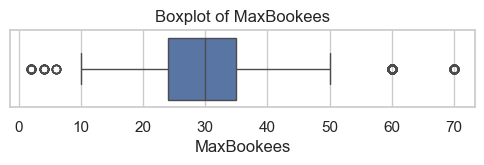

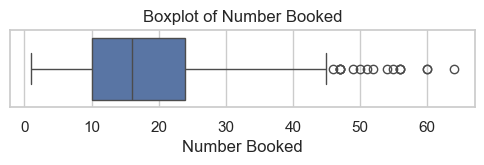

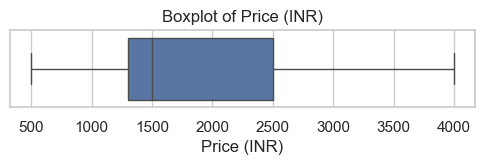

In [627]:

for col in ['MaxBookees', 'Number Booked', 'Price (INR)']:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df_merged, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [628]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Capping the outliers
    return series.clip(lower=lower, upper=upper)


In [629]:
# Apply IQR capping
df_merged['MaxBookees'] = cap_outliers_iqr(df_merged['MaxBookees'])
df_merged['Number Booked'] = cap_outliers_iqr(df_merged['Number Booked'])
df_merged['Price (INR)'] = cap_outliers_iqr(df_merged['Price (INR)'])


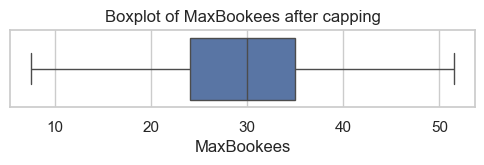

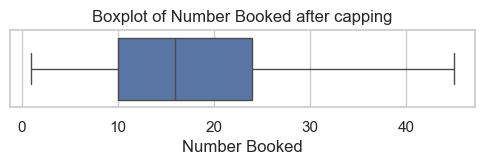

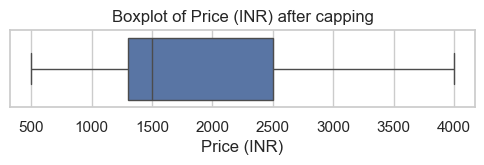

In [630]:
for col in ['MaxBookees', 'Number Booked', 'Price (INR)']:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df_merged, x=col)
    plt.title(f'Boxplot of {col} after capping')
    plt.show()


## Transform data

In [632]:
# Convert 'BookingEndDateTime' to datetime
df_merged['BookingEndDateTime'] = pd.to_datetime(df_merged['BookingEndDateTime (Month / Day / Year)'], errors='coerce')

# Convert 'BookingStartTime' to time
df_merged['BookingStartTime'] = pd.to_datetime(df_merged['BookingStartTime'], format='%H:%M:%S', errors='coerce').dt.time
df_merged['BookingStartTime']

0       14:45:00
1       14:45:00
2       14:45:00
3       14:45:00
4       14:45:00
          ...   
3266    18:30:00
3267    18:30:00
3268    18:00:00
3269    18:00:00
3270    18:00:00
Name: BookingStartTime, Length: 3271, dtype: object

## Scaling features

In [634]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['MaxBookees', 'Number Booked', 'Price (INR)']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_values = scaler.fit_transform(df_merged[numeric_cols])

# Add back to DataFrame
df_merged[['MaxBookees_scaled', 'NumberBooked_scaled', 'Price_scaled']] = scaled_values


In [635]:
# Strip spaces and lowercase activity description
df_merged['ActivityDescription'] = df_merged['ActivityDescription'].str.strip().str.lower()

# Convert BookingEndDateTime to datetime
df_merged['BookingEndDateTime (Month / Day / Year)'] = pd.to_datetime(df_merged['BookingEndDateTime (Month / Day / Year)'], errors='coerce')


In [636]:
df_merged.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),BookingEndDateTime,MaxBookees_scaled,NumberBooked_scaled,Price_scaled
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,25.0,12,499.0,2018-04-08,-0.479854,-0.542729,-1.708124
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,25.0,15,499.0,2018-04-15,-0.479854,-0.222573,-1.708124
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,25.0,14,499.0,2018-04-22,-0.479854,-0.329291,-1.708124
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,25.0,9,499.0,2018-04-29,-0.479854,-0.862885,-1.708124
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,25.0,7,499.0,2018-05-06,-0.479854,-1.076322,-1.708124


In [637]:
import re
import pandas as pd

# Define standardization function
def standardize_description(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                           # Convert to lowercase
    text = re.sub(r"[^a-z0-9:\.\-\s]", " ", text) # Keep alphanumeric, time symbols
    text = re.sub(r"\s+", " ", text)              # Remove extra spaces
    text = text.strip()
    return text

# Apply to merged DataFrame
df_merged['ActivityDescription_clean'] = df_merged['ActivityDescription'].apply(standardize_description)

# Preview cleaned versions
df_merged[['ActivityDescription', 'ActivityDescription_clean']].drop_duplicates().head(10)


,ActivityDescription,ActivityDescription_clean
0,20-20-20 2.45pm-3.45pm,20-20-20 2.45pm-3.45pm
8,20-20-20 7.00-8.00pm,20-20-20 7.00-8.00pm
17,20-20-20 9.30-10.30am,20-20-20 9.30-10.30am
35,20:20:20 10-11 am,20:20:20 10-11 am
44,20:20:20 10.00-11.00am,20:20:20 10.00-11.00am
52,20:20:20 11am -12noon,20:20:20 11am -12noon
59,20:20:20 9.30-10.30am,20:20:20 9.30-10.30am
67,20:20:20 9.30-10.30am,20:20:20 9.30-10.30am
75,45min madness 9.15-10am,45min madness 9.15-10am
84,abs blast 7.45-8.15am,abs blast 7.45-8.15am


In [638]:
# Drop one or more activity description columns
df_merged.drop(columns=['ActivityDescription'], inplace=True, errors='ignore')


📈 Skewness of Numeric Features:
Price (INR)            0.606907
Price_scaled           0.606907
Number Booked          0.350926
NumberBooked_scaled    0.350926
MaxBookees             0.132649
MaxBookees_scaled      0.132649
dtype: float64


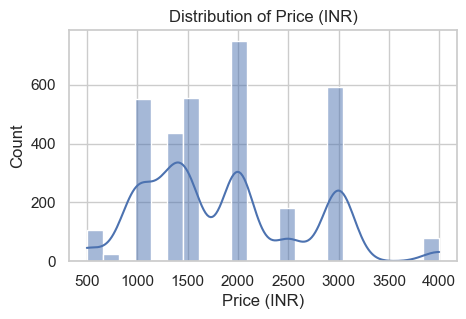

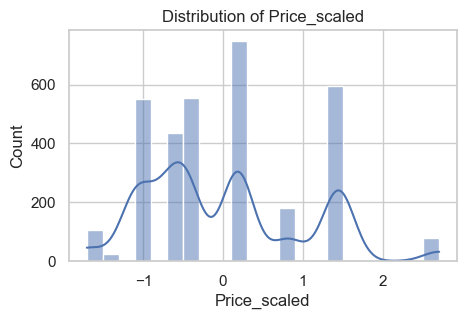

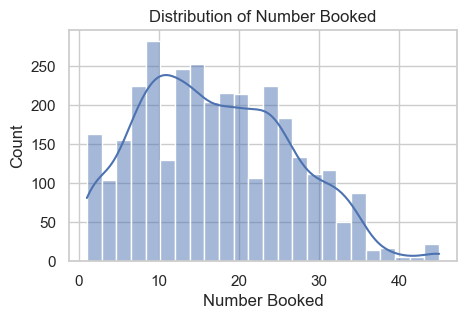

In [639]:
numeric_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns

# Check skewness
skew_values = df_merged[numeric_cols].skew().sort_values(ascending=False)

print("📈 Skewness of Numeric Features:")
print(skew_values)
for col in skew_values.head(3).index:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Apply Log Transform

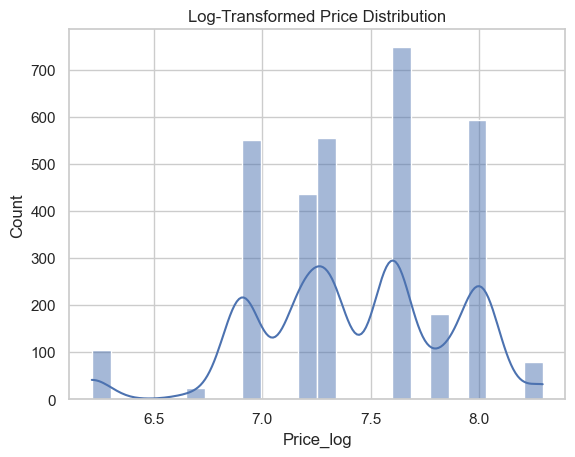

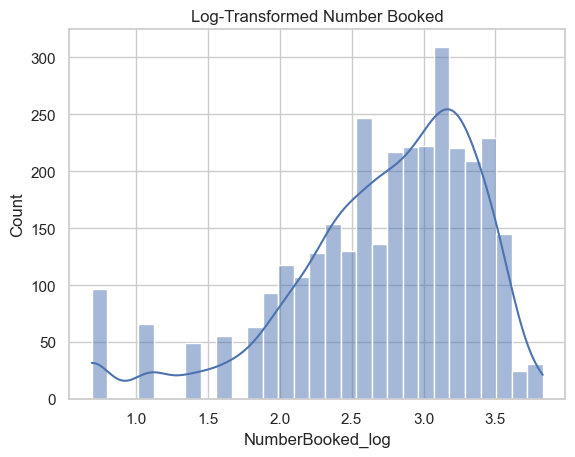

In [641]:
df_merged['Price_log'] = np.log1p(df_merged['Price (INR)'])
df_merged['NumberBooked_log'] = np.log1p(df_merged['Number Booked'])
sns.histplot(df_merged['Price_log'], kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

sns.histplot(df_merged['NumberBooked_log'], kde=True)
plt.title("Log-Transformed Number Booked")
plt.show()

In [672]:
# Perform one-hot encoding with integer dtype
df_merged = pd.get_dummies(df_merged, columns=['ActivitySiteID'], drop_first=True, dtype="int")

# Check resulting dummy columns
print(df_merged.filter(like='ActivitySiteID_').head())


   ActivitySiteID_HXP  ActivitySiteID_NBL  ActivitySiteID_SBP  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   1                   0                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   ActivitySiteID_TSC  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [674]:
df_merged.head()

,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),BookingEndDateTime,MaxBookees_scaled,NumberBooked_scaled,Price_scaled,ActivityDescription_clean,Price_log,NumberBooked_log,ActivitySiteID_HXP,ActivitySiteID_NBL,ActivitySiteID_SBP,ActivitySiteID_TSC
0,2018-04-08,14:45:00,25.0,12,499.0,2018-04-08,-0.479854,-0.542729,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.564949,1,0,0,0
1,2018-04-15,14:45:00,25.0,15,499.0,2018-04-15,-0.479854,-0.222573,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.772589,1,0,0,0
2,2018-04-22,14:45:00,25.0,14,499.0,2018-04-22,-0.479854,-0.329291,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.708050,1,0,0,0
3,2018-04-29,14:45:00,25.0,9,499.0,2018-04-29,-0.479854,-0.862885,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.302585,1,0,0,0
4,2018-05-06,14:45:00,25.0,7,499.0,2018-05-06,-0.479854,-1.076322,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.079442,1,0,0,0


## Binning

In [677]:
bins = [0, 1000, 2000, 5000]
labels = ['Low', 'Medium', 'High']
df_merged['Price_Tier'] = pd.cut(df_merged['Price (INR)'], bins=bins, labels=labels)


In [679]:
df_merged = pd.get_dummies(df_merged, columns=['Price_Tier'], drop_first=True, dtype='int')


In [681]:
# Check shape before
print("Before dropping duplicates:", df_merged.shape)

# Drop exact duplicate rows
df_merged.drop_duplicates(inplace=True)

# Check shape after
print("After dropping duplicates:", df_merged.shape)


Before dropping duplicates: (3271, 18)
After dropping duplicates: (3271, 18)


In [354]:
# Check if MaxBookees exceeds reasonable limit (e.g., 100 participants per class)
assert df_merged['MaxBookees_scaled'].max() <= 100, "⚠️ MaxBookees exceeds expected maximum (100)."

# Check for negative or zero prices
invalid_prices = df_merged[df_merged['Price (INR)'] <= 0]
print(f"Invalid price entries found: {len(invalid_prices)}")

# Check if Number Booked > Max Bookees
overbooked = df_merged[df_merged['Number Booked'] > df_merged['MaxBookees_scaled']]
print(f"Overbooked classes: {len(overbooked)}")


Invalid price entries found: 0
Overbooked classes: 3269


In [683]:
df_merged

,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),BookingEndDateTime,MaxBookees_scaled,NumberBooked_scaled,Price_scaled,ActivityDescription_clean,Price_log,NumberBooked_log,ActivitySiteID_HXP,ActivitySiteID_NBL,ActivitySiteID_SBP,ActivitySiteID_TSC,Price_Tier_Medium,Price_Tier_High
0,2018-04-08,14:45:00,25.0,12,499.0,2018-04-08,-0.479854,-0.542729,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.564949,1,0,0,0,0,0
1,2018-04-15,14:45:00,25.0,15,499.0,2018-04-15,-0.479854,-0.222573,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.772589,1,0,0,0,0,0
2,2018-04-22,14:45:00,25.0,14,499.0,2018-04-22,-0.479854,-0.329291,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.708050,1,0,0,0,0,0
3,2018-04-29,14:45:00,25.0,9,499.0,2018-04-29,-0.479854,-0.862885,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.302585,1,0,0,0,0,0
4,2018-05-06,14:45:00,25.0,7,499.0,2018-05-06,-0.479854,-1.076322,-1.708124,20-20-20 2.45pm-3.45pm,6.214608,2.079442,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,2018-06-18,18:30:00,18.0,9,1299.0,2018-06-18,-1.061188,-0.862885,-0.698680,zumba 6.30-7.30pm,7.170120,2.302585,0,0,0,1,1,0
3267,2018-06-25,18:30:00,18.0,9,1299.0,2018-06-25,-1.061188,-0.862885,-0.698680,zumba 6.30-7.30pm,7.170120,2.302585,0,0,0,1,1,0
3268,2018-06-07,18:00:00,50.0,16,1299.0,2018-06-07,1.596339,-0.115854,-0.698680,zumba - 6-7pm,7.170120,2.833213,0,0,0,1,1,0
3269,2018-06-14,18:00:00,50.0,13,1299.0,2018-06-14,1.596339,-0.436010,-0.698680,zumba - 6-7pm,7.170120,2.639057,0,0,0,1,1,0


In [687]:
df_merged.to_excel("output.xlsx")